In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import imputation
from matplotlib import pyplot as plt

In [51]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score

# Evaluate

In [52]:
scorer = make_scorer(score_func=fbeta_score, beta=7.07)

In [19]:
fbeta_score()

0.46356272542867244

# Loading data

In [69]:
df = pd.read_csv("../data/raw/training_data_set.csv")
df = df.set_index("ID")
df = df.rename({'class':'target'}, axis=1)
df = df.replace({'na':np.nan}).astype(np.number)

df.head()

,target,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
ID,,,,,,,,,,,,,,,,,,,,,
0,0.0,76698.0,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,0.0,33058.0,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,0.0,41040.0,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,0.0,12.0,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,0.0,60874.0,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [54]:
asd = df.columns.to_series().apply(lambda x:x[:2])
l_hist = asd[asd.duplicated()].unique()

In [56]:
imputer = imputation.Imputer(strategy='most_frequent')

In [57]:
X = imputer.fit_transform(df.drop(columns=['target']))
y = df.target

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## log regression model

In [75]:
df_test = pd.read_csv("../data/raw/test_data_set.csv")
df_test = df_test.set_index("ID")
df_test = df_test.rename({'class':'target'}, axis=1)
df_test = df_test.replace({'na':np.nan}).astype(np.number)

X_test_o = imputer.transform(df_test)

In [59]:
model_0 = LogisticRegression()
model_0.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
y_pred = model_0.predict_proba(X_test_o)

In [84]:
y_train.mean()

0.016616915422885573

C:\Users\Alexandre\Anaconda3\envs\ldsa\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


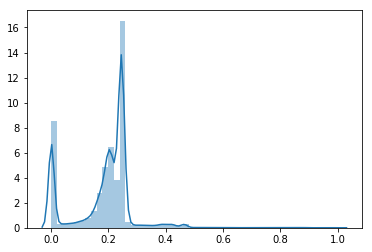

In [89]:
sns.distplot(y_pred[:,1])

In [92]:
(y_pred[:,1]>0.45).mean()

0.01325

In [191]:
df_predictions = pd.DataFrame((y_pred[:,1]>0.02).astype(np.int), columns=['class'], index=df_test.index)
df_predictions.head()

,class
ID,
600000,1
600001,1
600002,1
600003,1
600004,1


In [94]:
df_predictions.to_csv("../results/log_reg_predictions.csv")